In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/census-income.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##**Problem Statement**

- We have a **census dataset** which provide us multiple features in it. We have to extract the information by **cleaning the datset** and then we be using **Machine Learning algorithm** to find the **accuracy**.

- **Target Variable = annual_income**

- **Objective:**

 - Clean your Dataset.
 - Split dataset into 80:20.
 - We have to predict that what should be the annual income of the person when we pass the data for all the remaining features.
 - We have to find accuracy of the Model.

In [ ]:
df.shape

(32561, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.describe()  #Describe the statistics data.

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#When you want to describe object datatype columns.
#top = mode value (max)
#frequency = How many num of times mode value come. Here Private = 22696 repeated.

df.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [ ]:
#Combine Numerical & Object Datatype together.

df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


####**If there is Null Values in numerical datatype column. There are two ways to deal.**

1. Drop the row. (If 30% of the data and column is not required)
2. Fill values from mean & median.

####**If object datatype column.**

1. Fill values from mode.

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.isnull().sum().sum()  #Null value in entire dataset.

np.int64(0)

In [ ]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

    df.replace(' ?', np.nan, inplace=True)

This line will replace **only exact matches** of ' ?' (a question mark with a leading space) with np.nan across the **entire DataFrame.**

####**✅ What it does:**

- Replaces ' ?' (note the space before the question mark) globally.

- Works on **all columns**, regardless of data type.

- Does **not** replace '?' (no space), or values like ' ?' (two spaces).

      df = df.apply(lambda x: x.replace('?', np.nan) if x.dtype == 'object' else x)

Does **apply to all columns**, and it **replaces every '?'** in all object (string) columns — including **multiple columns** — with np.nan.

####**✅ What it does:**

- df.apply(...) applies the function column-wise.

- x.replace('?', np.nan) replaces '?' with np.nan in **that column.**

- The if x.dtype == 'object' ensures it only runs on string-type columns.



In [ ]:
df.replace(' ?', np.nan, inplace = True)

#df = df.apply(lambda x: x.replace(' ?', np.nan) if x.dtype == 'object' else x)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df['occupation'].nunique()

14

In [ ]:
#Filling mode values with mode.

df['native-country'].fillna((df['native-country']).mode()[0], inplace = True)


<ipython-input-95-463ff5a8d892>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['native-country'].fillna((df['native-country']).mode()[0], inplace = True)


In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(30718, 15)

In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
#Outliers ----> Find & Remove it
#Condition: Before LabelEncoding

'''-----------------------------------
Boxplot always get for integer col/ value.

IQR ---> ?
IQR = Q3 - Q1
Q3 = 75% (numpy)
Q1 = 25% (numpy)

UpperBound = Q3 + (1.5 * IQR)
LowerBound = Q1 - (1.5 * IQR)

-------------------------------------'''

'-----------------------------------\nBoxplot always get for integer col/ value.\n\nIQR ---> ?\nIQR = Q3 - Q1\nQ3 = 75% (numpy)\nQ1 = 25% (numpy)\n\nUpperBound = Q3 + (1.5 * IQR)\nLowerBound = Q1 - (1.5 * IQR)\n\n-------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Index: 30694 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30694 non-null  int64 
 1   workclass       30694 non-null  object
 2   fnlwgt          30694 non-null  int64 
 3   education       30694 non-null  object
 4   education-num   30694 non-null  int64 
 5   marital-status  30694 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    30694 non-null  object
 8   race            30694 non-null  object
 9   sex             30694 non-null  object
 10  capital-gain    30694 non-null  int64 
 11  capital-loss    30694 non-null  int64 
 12  hours-per-week  30694 non-null  int64 
 13  native-country  30694 non-null  object
 14  income          30694 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


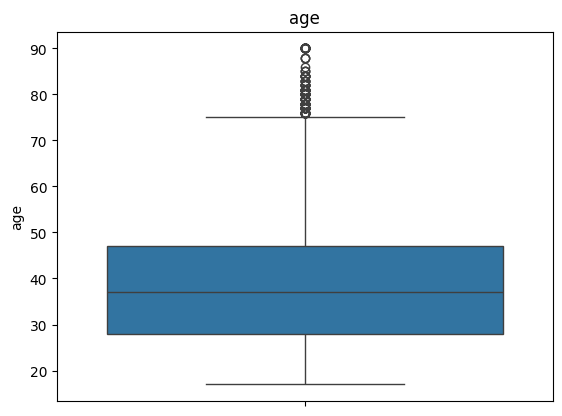

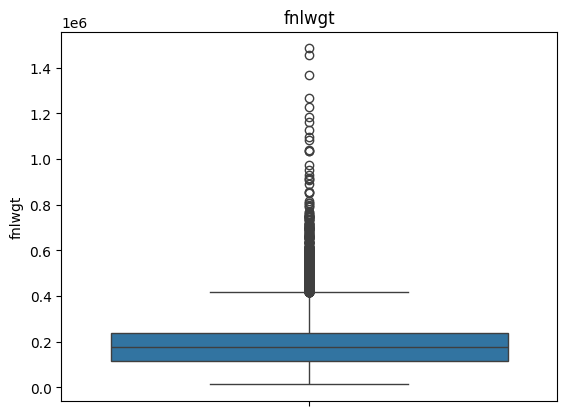

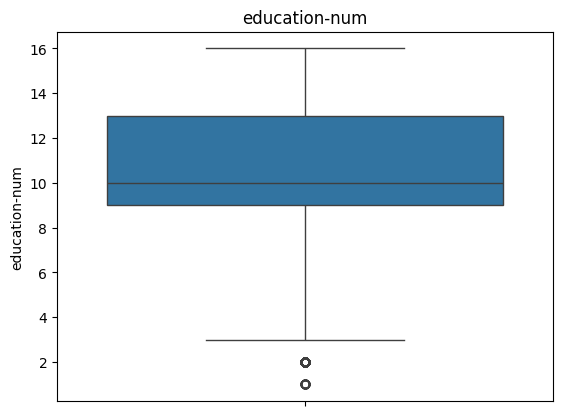

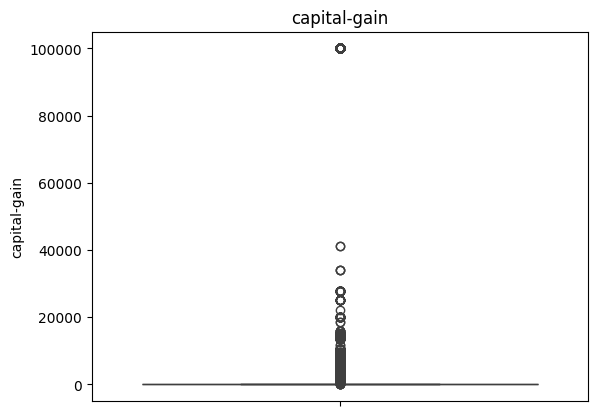

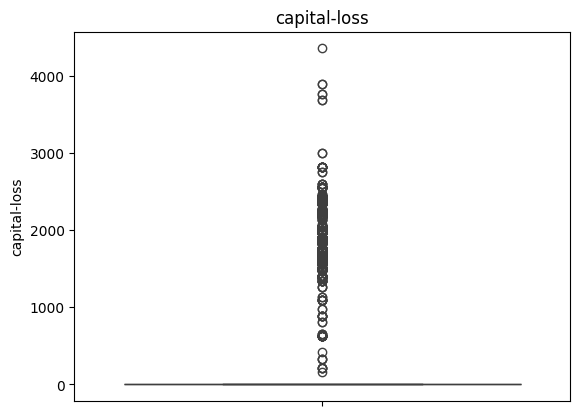

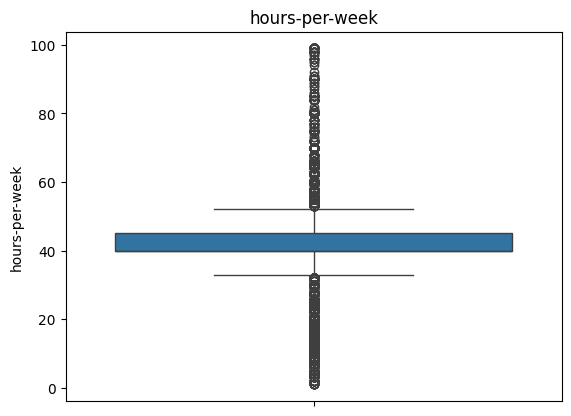

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

#Drop null values
df.dropna(inplace = True)

#Check Null Values
df.isnull().sum()

#Check duplicates values
df.duplicated().sum()

#Drop Duplicate values
df.drop_duplicates(inplace = True)

#Check Information
df.info()

import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot with outliers

for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

###**✅ Fix: Use boolean indexing properly**

To **keep only outliers**, you'd write:

    return x[(x < LowerBound) | (x > UpperBound)]

To **remove outliers** (i.e., keep only inliers), use:

    return x[(x >= LowerBound) & (x <= UpperBound)]

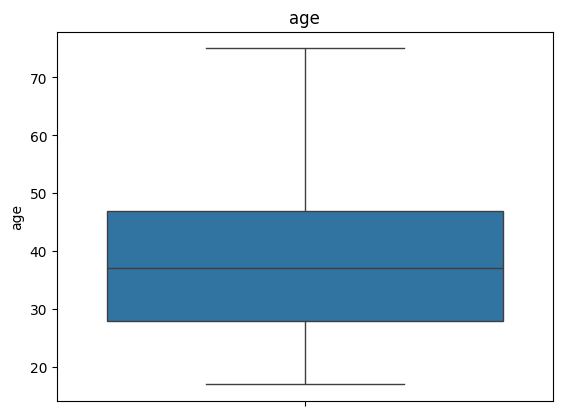

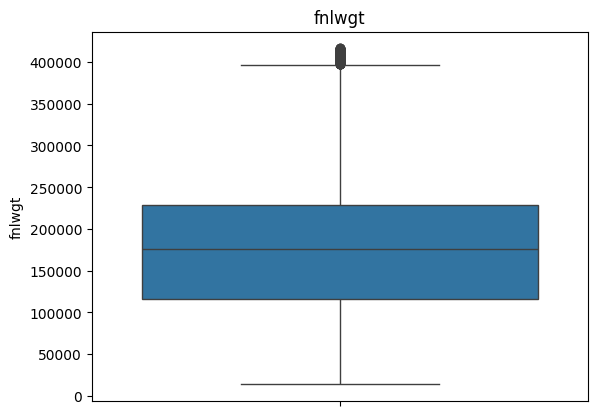

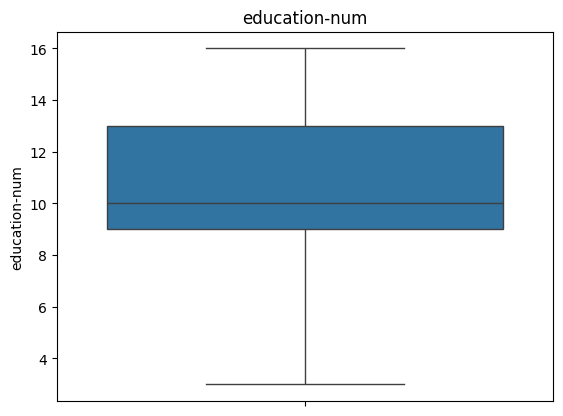

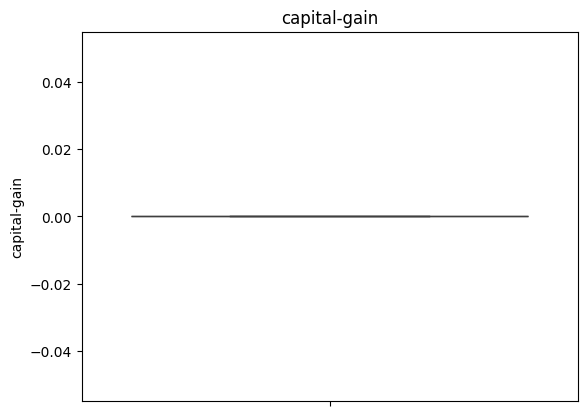

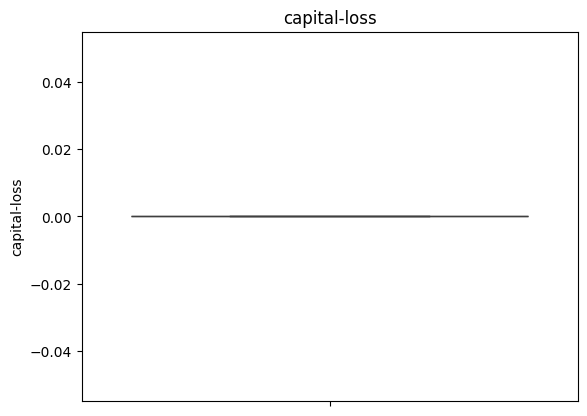

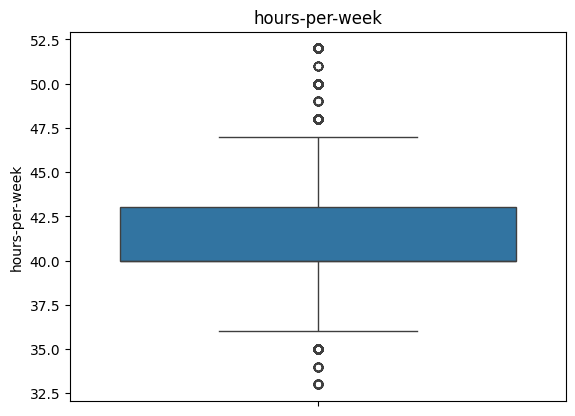

In [ ]:
#IQR

'''
Q1 = data.quantile(0.25)  #Pandas lib use
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

UpperBound = Q3 + (1.5 * IQR)
LowerBound = Q1 - (1.5 * IQR)

'''

#OR

def remove_outlier(x):
  Q1 = x.quantile(0.25)  #Pandas lib use
  Q3 = x.quantile(0.75)
  IQR = Q3 - Q1
  UpperBound = Q3 + (1.5 * IQR)
  LowerBound = Q1 - (1.5 * IQR)
  return x[(x >= LowerBound) & (x <= UpperBound)]

#For loop run. Apply to numeric columns
#Boxplot without outliers

for col in df.columns:
  if df[col].dtype != 'object':
    df[col]  = remove_outlier(df[col])
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()


'''
✅ How to Use It:
For one column (e.g., 'age'):

df['age'] = remove_outlier(df['age'])

'''
#Optional step, but necessary
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [ ]:

#Check Null Values after removing outliers
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18774 entries, 2 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             18774 non-null  float64
 1   workclass       18774 non-null  object 
 2   fnlwgt          18774 non-null  float64
 3   education       18774 non-null  object 
 4   education-num   18774 non-null  float64
 5   marital-status  18774 non-null  object 
 6   occupation      18774 non-null  object 
 7   relationship    18774 non-null  object 
 8   race            18774 non-null  object 
 9   sex             18774 non-null  object 
 10  capital-gain    18774 non-null  float64
 11  capital-loss    18774 non-null  float64
 12  hours-per-week  18774 non-null  float64
 13  native-country  18774 non-null  object 
 14  income          18774 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.3+ MB


In [ ]:
# Coverting object column into numerical ---> Label Encoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
#le = LabelEncoder()

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Encoding column: {col}")  # Watch this
        df[col] = df[col].str.strip()
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))


Encoding column: workclass
Encoding column: education
Encoding column: marital-status
Encoding column: occupation
Encoding column: relationship
Encoding column: race
Encoding column: sex
Encoding column: native-country
Encoding column: income


In [ ]:
"""
OR

for col in df.columns:
  if df[col].dtype == 'Object':
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

"""

"\nOR\n\nfor col in df.columns:\n  if df[col].dtype == 'Object':\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n\n"

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38.0,2,215646.0,10,9.0,0,5,1,4,1,0.0,0.0,40.0,37,0
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,0.0,0.0,40.0,37,0
4,28.0,2,338409.0,8,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0
5,37.0,2,284582.0,11,14.0,2,3,5,4,0,0.0,0.0,40.0,37,0
7,52.0,4,209642.0,10,9.0,2,3,0,4,1,0.0,0.0,45.0,37,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18774 entries, 2 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             18774 non-null  float64
 1   workclass       18774 non-null  int64  
 2   fnlwgt          18774 non-null  float64
 3   education       18774 non-null  int64  
 4   education-num   18774 non-null  float64
 5   marital-status  18774 non-null  int64  
 6   occupation      18774 non-null  int64  
 7   relationship    18774 non-null  int64  
 8   race            18774 non-null  int64  
 9   sex             18774 non-null  int64  
 10  capital-gain    18774 non-null  float64
 11  capital-loss    18774 non-null  float64
 12  hours-per-week  18774 non-null  float64
 13  native-country  18774 non-null  int64  
 14  income          18774 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.3 MB


In [ ]:
#Find Correlation
corr = df.corr(numeric_only= True)

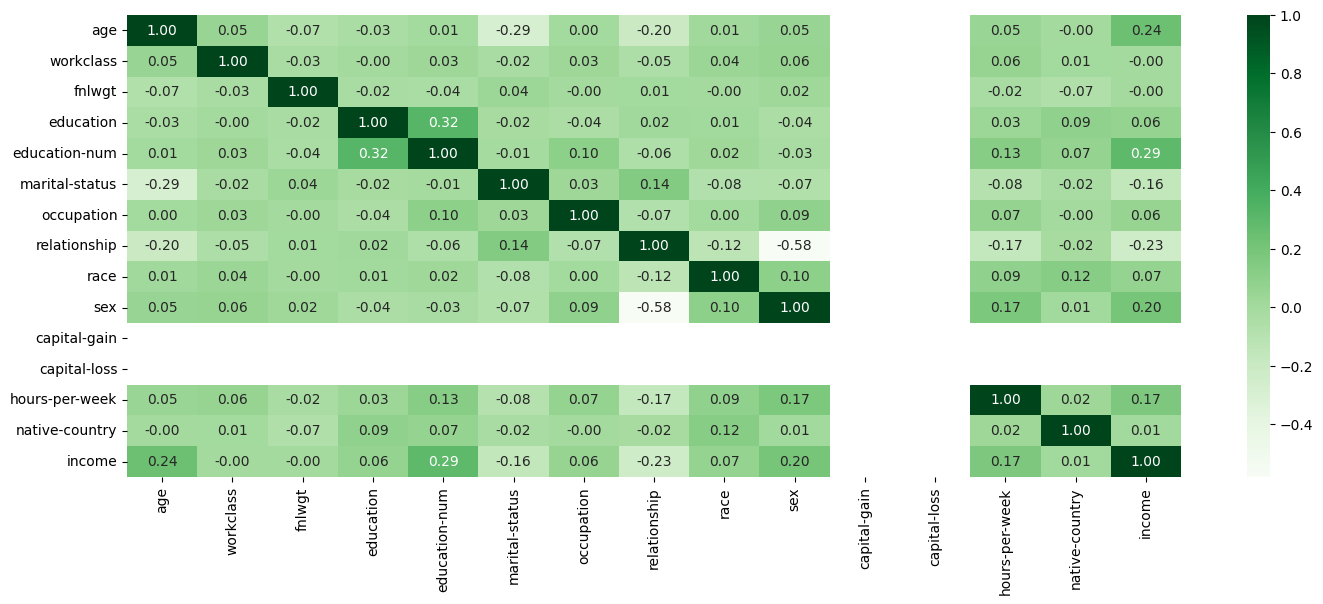

In [ ]:
# Heatmap

plt.figure(figsize = (17, 6))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'Greens')
plt.show()

In [ ]:
df.drop(columns = ['capital-gain', 'capital-loss'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18774 entries, 2 to 32558
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             18774 non-null  float64
 1   workclass       18774 non-null  int64  
 2   fnlwgt          18774 non-null  float64
 3   education       18774 non-null  int64  
 4   education-num   18774 non-null  float64
 5   marital-status  18774 non-null  int64  
 6   occupation      18774 non-null  int64  
 7   relationship    18774 non-null  int64  
 8   race            18774 non-null  int64  
 9   sex             18774 non-null  int64  
 10  hours-per-week  18774 non-null  float64
 11  native-country  18774 non-null  int64  
 12  income          18774 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 2.0 MB


###**Model Building**

In [ ]:
x = df.iloc[:,:-1] #Select all rows and columns (Features/Input), except the last column --> Target column
y = df.iloc[:,-1]  #Select last rows and last column that is target column (Target/Output)

In [ ]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
2,38.0,2,215646.0,10,9.0,0,5,1,4,1,40.0,37
3,53.0,2,234721.0,1,7.0,2,5,0,2,1,40.0,37
4,28.0,2,338409.0,8,13.0,2,9,5,2,0,40.0,4
5,37.0,2,284582.0,11,14.0,2,3,5,4,0,40.0,37
7,52.0,4,209642.0,10,9.0,2,3,0,4,1,45.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53.0,2,321865.0,11,14.0,2,3,0,4,1,40.0,37
32555,22.0,2,310152.0,13,10.0,4,10,1,4,1,40.0,37
32556,27.0,2,257302.0,6,12.0,2,12,5,4,0,38.0,37
32557,40.0,2,154374.0,10,9.0,2,6,0,4,1,40.0,37


In [ ]:
y

,income
2,0
3,0
4,0
5,0
7,1
...,...
32554,1
32555,0
32556,0
32557,1


In [ ]:
#split into 80:20

from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

###**Logistic Regression**

- **Classification Model** (It works on discreate data. Eg; 0 or 1, True or False etc).
- Mainly it works on categorical data.
- Sigmoid Curve.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
#Model Fitting
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Model Prediction
pred = model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import *  # * ---> all

In [ ]:
#Accuracy Score
acurracy_rate = accuracy_score(y_test, pred)
acurracy_rate

0.7901464713715046

In [ ]:
#Create Confusion Metrics

class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3011
           1       0.41      0.13      0.20       744

    accuracy                           0.79      3755
   macro avg       0.61      0.54      0.54      3755
weighted avg       0.73      0.79      0.74      3755



###**📊 Report Decode:**

- You have a **binary classification problem** (two classes: 0 and 1).

- Total samples: 3755

 - Class **0**: 3011 samples

 - Class **1**: 744 samples

 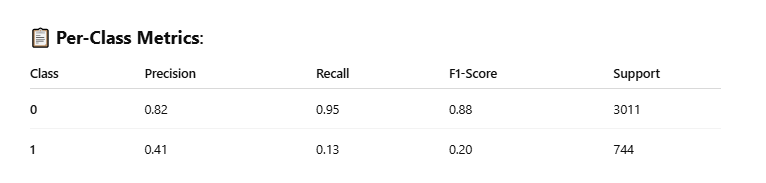



####**🔹 Class 0:**

- **Precision (0.82)**: When the model predicts class 0, it's correct 82% of the time.

- **Recall (0.95)**: It correctly identifies 95% of the actual class 0 samples.

- **F1-score (0.88)**: Harmonic mean of precision and recall — strong performance.

####**🔹 Class 1 (minority class):**

- **Precision (0.41)**: Only 41% of the time the model’s prediction of class 1 is correct.

- **Recall (0.13)**: The model captures only 13% of the actual class 1s (very poor).

- **F1-score (0.20)**: Very weak performance on class 1 — model struggles with this class.

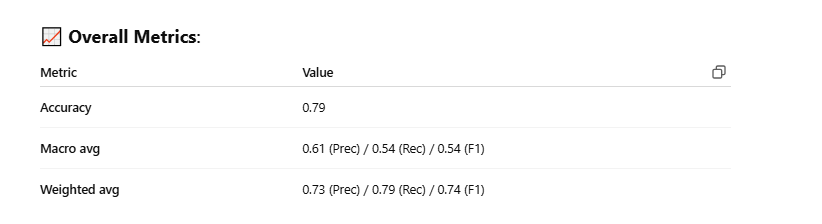

####**🔸 Accuracy (0.79):**

- 79% of all predictions were correct.

- ⚠️ Be careful: this is **misleading** due to class imbalance (class 0 dominates).

####**🔸 Macro Avg:**

- Average **unweighted** mean across both classes.

- Treats both classes equally — useful when you care about both classes **regardless of support.**

####**🔸 Weighted Avg:**

- Averages weighted by **support** (number of instances per class).

- Dominated by performance on class 0.

###**⚠️ Key Insight:**

- Your model performs **very well on class 0**, but **very poorly on class 1**.

- This is likely due to **class imbalance** (class 0 has 3011 vs class 1's 744).

- High accuracy is misleading because the model is biased toward the majority class.

###**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Model Fitting
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Model Prediction
prediction_model = decision_tree.predict(x_test)
prediction_model

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#Check Model Accuracy
acc_rate = accuracy_score(y_test, prediction_model)
print(acc_rate)

0.7808255659121172


In [ ]:
class_report = classification_report(y_test, prediction_model)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3011
           1       0.45      0.53      0.49       744

    accuracy                           0.78      3755
   macro avg       0.67      0.68      0.67      3755
weighted avg       0.79      0.78      0.79      3755



###**Random Forest**

 Bagging and boosting are both ensemble learning techniques — they combine multiple models to improve performance, but they work very differently.

- Random Forest Use **Bagging Technique**

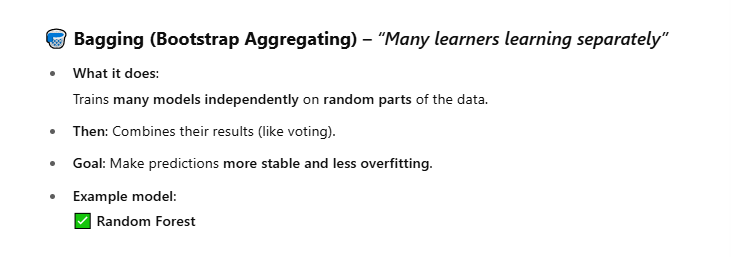

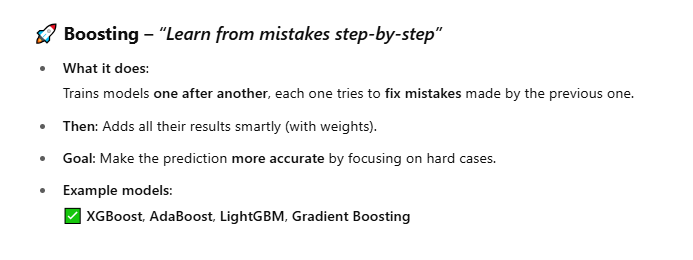

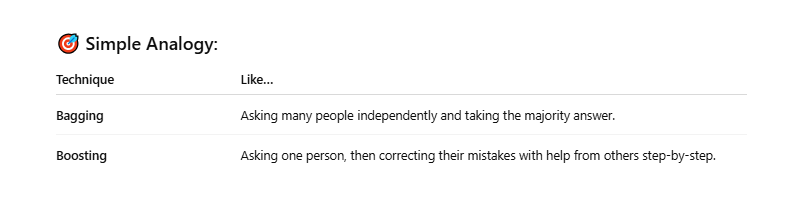

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
#Model Fitting

rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#Model Prediction

pred_rf = rf_model.predict(x_test)
pred_rf

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#Check Model Accuracy
acc_rate_rf = accuracy_score(y_test, pred_rf)
print(acc_rate_rf)

0.8396804260985353


In [ ]:
class_report_rf = classification_report(y_test, pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3011
           1       0.61      0.52      0.56       744

    accuracy                           0.84      3755
   macro avg       0.75      0.72      0.73      3755
weighted avg       0.83      0.84      0.83      3755



In [ ]:
# rf_model.predict([[1,2,3,4.....12]]) --> Use double square bracket & value should be equal to number of columns selected. Here is 12.
# You must pass double square brackets because it will be considered a single unit.
# Whatever the num of columns you have that value you should pass.